In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [85]:
cian = pd.read_csv('/Users/issaya/PyCharmMiscProject/cian_processed.csv')
cian

,Цена_за_метр,Метро,Район,Этаж_квартиры,Этажность_здания,Площадь_помещения,Тип_недвижимости,seller_type,Документы_проверены,Супер_агент,...,Кол-во_комнат,Время_до_метро,floor_group,Центральный,Спальный,Прибрежный,Промышленный,Срочная_продажа,Группа_этажности,Ранг_метро
0,121023,Шушары,Пушкинский,7,9,50.780127,1,ПРЕДСТАВИТЕЛЬ ЗАСТРОЙЩИКА,0,0,...,1,2.400000,[5-10],0,1,0,0,0,3,70
1,4124,Черная речка,Приморский,5,9,362.000000,1,АГЕНТСТВО НЕДВИЖИМОСТИ,1,0,...,1,10.000000,[5-10],0,0,1,0,0,3,25
2,121118,Шушары,Колпинский,4,12,32.200000,1,АГЕНТСТВО НЕДВИЖИМОСТИ,1,0,...,1,3.150000,[11-20],0,1,0,1,0,4,70
3,115113,Ладожская,Красногвардейский,1,5,46.400000,0,УК・ОФ.ПРЕДСТАВИТЕЛЬ,1,0,...,1,2.250000,[5-10],0,1,0,0,0,3,3
4,122281,Проспект ветеранов,Красносельский,2,9,32.000000,1,АГЕНТСТВО НЕДВИЖИМОСТИ,1,0,...,1,1.800000,[5-10],0,1,1,0,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28320,660000,Петроградская,Петроградский,6,6,102.372567,1,ЗАСТРОЙЩИК,0,0,...,0,16.000000,[5-10],1,0,0,0,0,3,11
28321,521900,Балтийская,Адмиралтейский,2,9,62.319242,1,ЗАСТРОЙЩИК,0,0,...,0,4.000000,[5-10],1,0,0,0,0,3,29
28322,155340,Гражданский проспект,Калининский,3,9,30.900000,1,РИЕЛТОР,0,1,...,0,0.900000,[5-10],0,1,0,1,0,3,19
28323,166667,Проспект просвещения,Выборгский,1,12,32.100000,1,АГЕНТСТВО НЕДВИЖИМОСТИ,1,0,...,0,16.000000,[11-20],0,1,0,0,0,4,9


### Линейная регрессия

/var/folders/bm/39vh_d456d388sl7tv8xtz540000gn/T/ipykernel_52793/517701121.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cian_lin['Ранг_метро'].fillna(cian_lin['Ранг_метро'].mean(), inplace=True)


R²: 0.28
MAE: 76445.33
RMSE: 124050.82
                            OLS Regression Results                            
Dep. Variable:           Цена_за_метр   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     577.8
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:41:10   Log-Likelihood:            -2.9827e+05
No. Observations:               22660   AIC:                         5.966e+05
Df Residuals:                   22643   BIC:                         5.967e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

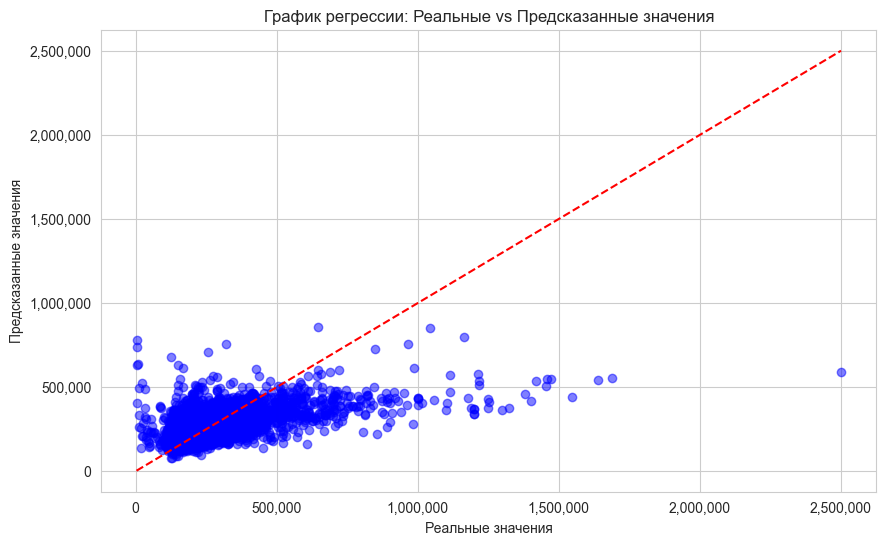

In [95]:
# Убираем строки, где 'Ранг_метро' имеет значение 'нет информации'
cian_lin = cian[cian['Ранг_метро'] != 'нет информации']

# Преобразуем 'Ранг_метро' в числовой формат, заменив 'нет информации' на NaN, если это необходимо
cian_lin['Ранг_метро'] = pd.to_numeric(cian_lin['Ранг_метро'], errors='coerce')

# Если есть NaN, можно заполнить их средним значением или удалить
cian_lin['Ранг_метро'].fillna(cian_lin['Ранг_метро'].mean(), inplace=True)

# Готовим данные для регрессии
scaler = MinMaxScaler()
cian_lin['Нормализованный_ранг_метро'] = scaler.fit_transform(cian_lin[['Ранг_метро']])
a = list(cian_lin.columns)
a.remove('Цена_за_метр')
a.remove('Метро')
a.remove('Название_ЖК')
a.remove('floor_group')
a.remove('Ранг_метро')
a.remove('seller_type')
a.remove('Район')
x_lin = cian_lin[a]
y_lin = cian_lin['Цена_за_метр']
# Разделяем данные на обучающую и тестовую выборки
  # y - целевая переменная

# Добавляем константу для statsmodels (смещение)
x_lin = sm.add_constant(x_lin)

# Разделяем данные на train и test
X_train, X_test, y_train, y_test = train_test_split(x_lin, y_lin, test_size=0.2, random_state=42)

# Обучение модели с sklearn
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

# Предсказание
y_pred = model_1.predict(X_test)

# Оценка модели
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# Вывод метрик
print(f"R²: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Строим модель в statsmodels для расчета p-value
model_sm = sm.OLS(y_train, X_train).fit()
print(model_sm.summary())  # Здесь появятся p-values

# График предсказаний
plt.figure(figsize=(10, 6))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.title("График регрессии: Реальные vs Предсказанные значения")
plt.grid(True)
plt.show()

Мы видим, что некоторые факторы незначимы и линейная регрессия имеет довольно низкий R^2 и высокие MAE и MSE, что говорит о 
высокой ошибке. Уберем незначимые данные и проведем градиентный бустинг для предсказания. Но для начала попробуем убрать незначимые факторы и понизить мультиколлинеарность.

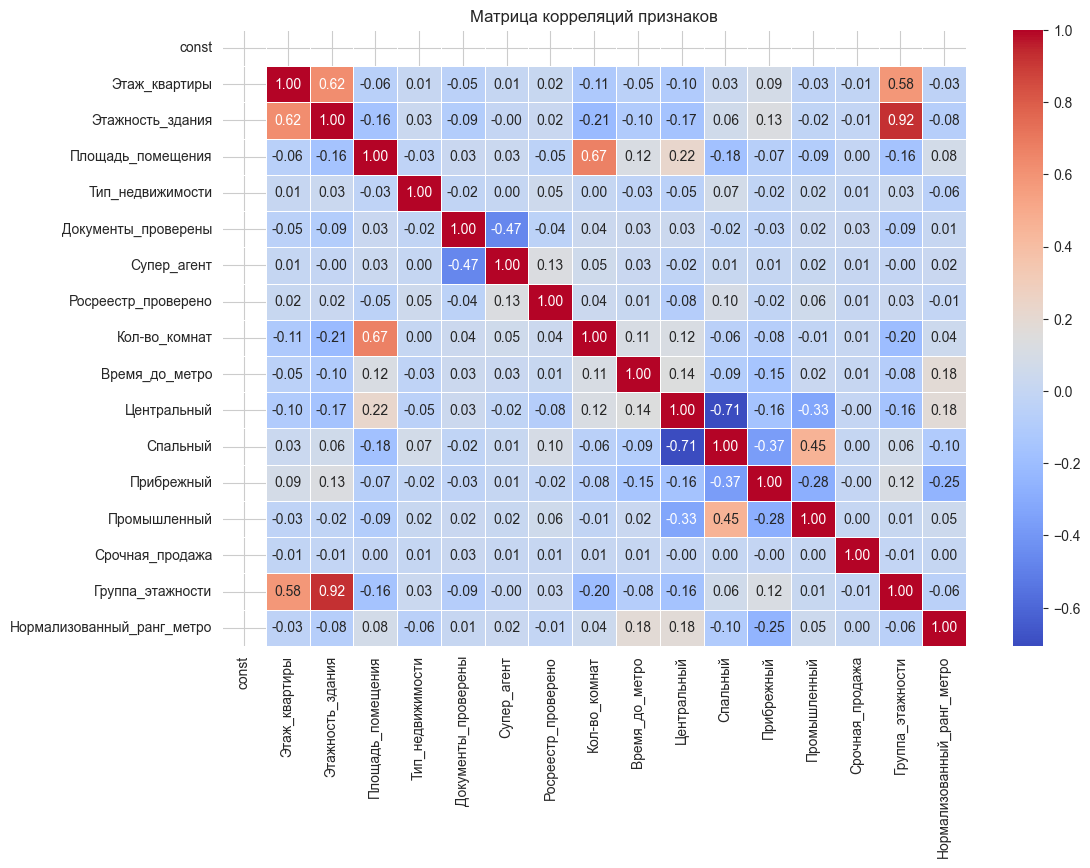

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = x_lin.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Матрица корреляций признаков")
plt.show()

Видим, что есть сильная корреляция между этажностью здания и группой этажности, уберем группу этажности, также как ни странно
есть зависимость между спальным и центральным районами, так что убираем центральный район.

R²: 0.27
MAE: 78322.56
RMSE: 125139.95
                            OLS Regression Results                            
Dep. Variable:           Цена_за_метр   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     658.2
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        05:30:10   Log-Likelihood:            -2.9852e+05
No. Observations:               22660   AIC:                         5.971e+05
Df Residuals:                   22646   BIC:                         5.972e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

/var/folders/bm/39vh_d456d388sl7tv8xtz540000gn/T/ipykernel_52793/719150260.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cian_lin['Ранг_метро'].fillna(cian_lin['Ранг_метро'].mean(), inplace=True)


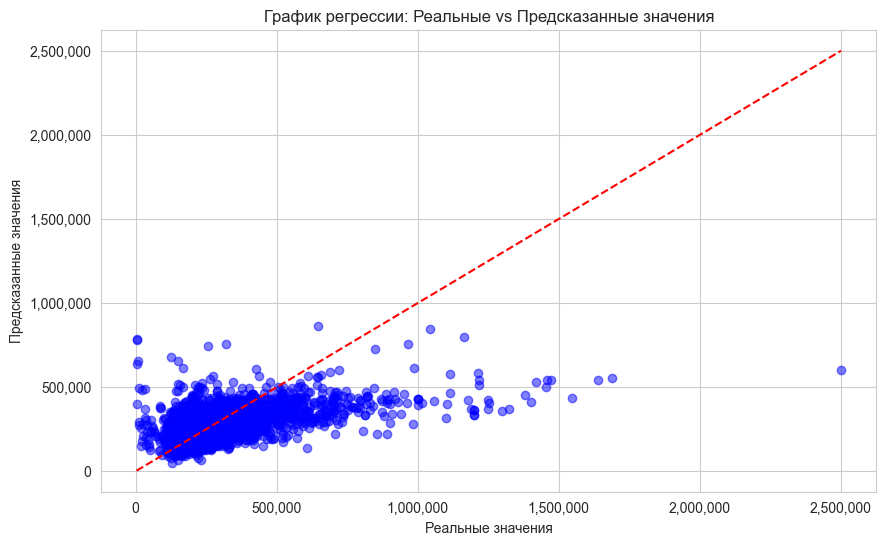

In [93]:
# Убираем строки, где 'Ранг_метро' имеет значение 'нет информации'
cian_lin = cian[cian['Ранг_метро'] != 'нет информации']

# Преобразуем 'Ранг_метро' в числовой формат, заменив 'нет информации' на NaN, если это необходимо
cian_lin['Ранг_метро'] = pd.to_numeric(cian_lin['Ранг_метро'], errors='coerce')

# Если есть NaN, можно заполнить их средним значением или удалить
cian_lin['Ранг_метро'].fillna(cian_lin['Ранг_метро'].mean(), inplace=True)

# Готовим данные для регрессии
scaler = MinMaxScaler()
cian_lin['Нормализованный_ранг_метро'] = scaler.fit_transform(cian_lin[['Ранг_метро']])
a = list(cian_lin.columns)
a.remove('Цена_за_метр')
a.remove('Метро')
a.remove('Название_ЖК')
a.remove('floor_group')
a.remove('Ранг_метро')
a.remove('seller_type')
a.remove('Район')
a.remove('Центральный')
a.remove('Группа_этажности')
a.remove('Промышленный')
x_lin = cian_lin[a]
y_lin = cian_lin['Цена_за_метр']
# Разделяем данные на обучающую и тестовую выборки
  # y - целевая переменная

# Добавляем константу для statsmodels (смещение)
x_lin = sm.add_constant(x_lin)

# Разделяем данные на train и test
X_train, X_test, y_train, y_test = train_test_split(x_lin, y_lin, test_size=0.2, random_state=42)

# Обучение модели с sklearn
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

# Предсказание
y_pred = model_1.predict(X_test)

# Оценка модели
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# Вывод метрик
print(f"R²: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Строим модель в statsmodels для расчета p-value
model_sm = sm.OLS(y_train, X_train).fit()
print(model_sm.summary())  # Здесь появятся p-values

# График предсказаний
plt.figure(figsize=(10, 6))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.title("График регрессии: Реальные vs Предсказанные значения")
plt.grid(True)
plt.show()

К сожалению, показатели линейной регрессии не улучшились. R^2 остался примерно таким же. MAE и MSE немого увеличились. Попробуем другие модели для повышения доли верного прогнозирования.

### Градиентный бустинг

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 480
[LightGBM] [Info] Number of data points in the train set: 22660, number of used features: 16
[LightGBM] [Info] Start training from score 264190.047793
MAE: 45113.589011290154 
RMSE: 83818.66635878052 
R²: 0.6705716353841678


/var/folders/bm/39vh_d456d388sl7tv8xtz540000gn/T/ipykernel_52793/2134091472.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10], palette="coolwarm")


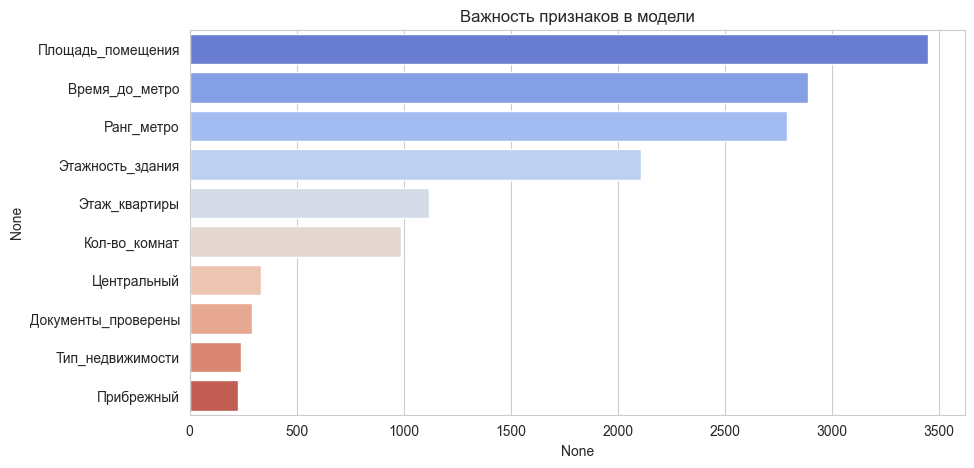

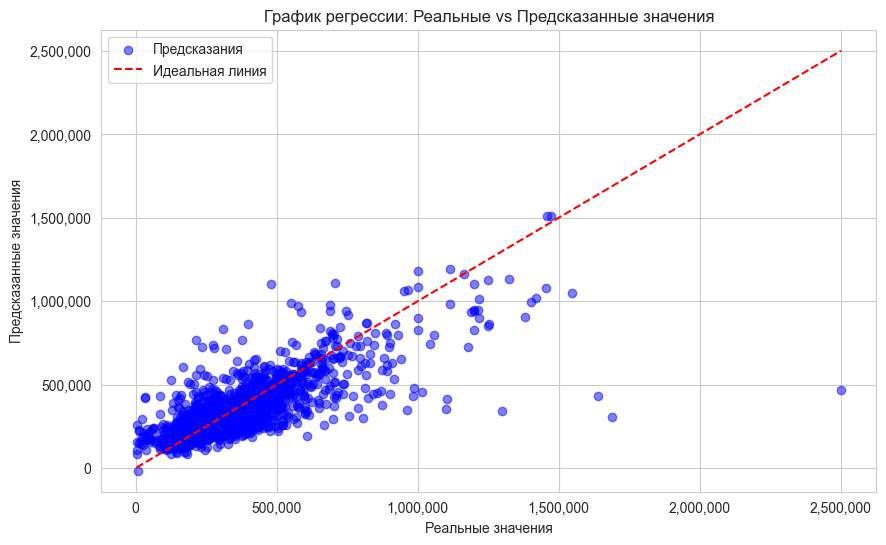

In [89]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Загружаем данные (если уже есть массив cian)
cian_bust = cian.copy()

cian_bust = cian_bust[['Цена_за_метр', 'Этаж_квартиры', 'Этажность_здания',
       'Площадь_помещения', 'Тип_недвижимости', 'Документы_проверены',
       'Супер_агент', 'Росреестр_проверено', 'Кол-во_комнат',
       'Время_до_метро', 'Центральный', 'Спальный', 'Прибрежный',
       'Промышленный', 'Срочная_продажа', 'Группа_этажности', 'Ранг_метро']]
# 1. Подготовка данных
target = "Цена_за_метр"
features = [col for col in cian_bust.columns if col != target]

# Разделяем признаки
x_bust = cian_bust[features]
y_bust = cian_bust[target]

# Заполняем пропущенные значения (для числовых - медианой, для категорий - "unknown")

# Разделяем на train/test
X_train, X_test, y_train, y_test = train_test_split(x_bust, y_bust, test_size=0.2, random_state=42)

# 2. Обучение модели
model = lgb.LGBMRegressor(n_estimators=500, learning_rate=0.05, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# 3. Оценка модели
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae} ")
print(f"RMSE: {rmse} ")
print(f"R²: {r2}")

# 4. Важность признаков
plt.figure(figsize=(10, 5))
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10], palette="coolwarm")
plt.title("Важность признаков в модели")
plt.show()

# 5. График регрессии (реальные значения vs предсказанные)
plt.figure(figsize=(10, 6))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Предсказания")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Идеальная линия")
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.title("График регрессии: Реальные vs Предсказанные значения")
plt.legend()
plt.grid(True)
plt.show()

Градиентный бустинг явно лучше справился с задачей, учитвая RAE, RMSE, R^2

### Лес

In [90]:
cian_tree = cian.drop(['Название_ЖК', 'Группа_этажности', 'Метро', 'floor_group', 'Район', 'Название_ЖК'], axis=1)
cian_tree = pd.get_dummies(cian_tree, columns=['seller_type'])
cian_tree

,Цена_за_метр,Этаж_квартиры,Этажность_здания,Площадь_помещения,Тип_недвижимости,Документы_проверены,Супер_агент,Росреестр_проверено,Кол-во_комнат,Время_до_метро,...,Срочная_продажа,Ранг_метро,seller_type_АГЕНТСТВО НЕДВИЖИМОСТИ,seller_type_ЗАСТРОЙЩИК,seller_type_КОНСУЛЬТАНТ,seller_type_Нет данных,seller_type_ПРЕДСТАВИТЕЛЬ ЗАСТРОЙЩИКА,seller_type_РИЕЛТОР,seller_type_СОБСТВЕННИК,seller_type_УК・ОФ.ПРЕДСТАВИТЕЛЬ
0,121023,7,9,50.780127,1,0,0,0,1,2.400000,...,0,70,False,False,False,False,True,False,False,False
1,4124,5,9,362.000000,1,1,0,0,1,10.000000,...,0,25,True,False,False,False,False,False,False,False
2,121118,4,12,32.200000,1,1,0,0,1,3.150000,...,0,70,True,False,False,False,False,False,False,False
3,115113,1,5,46.400000,0,1,0,0,1,2.250000,...,0,3,False,False,False,False,False,False,False,True
4,122281,2,9,32.000000,1,1,0,1,1,1.800000,...,0,2,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28320,660000,6,6,102.372567,1,0,0,0,0,16.000000,...,0,11,False,True,False,False,False,False,False,False
28321,521900,2,9,62.319242,1,0,0,0,0,4.000000,...,0,29,False,True,False,False,False,False,False,False
28322,155340,3,9,30.900000,1,0,1,1,0,0.900000,...,0,19,False,False,False,False,False,True,False,False
28323,166667,1,12,32.100000,1,1,0,0,0,16.000000,...,0,9,True,False,False,False,False,False,False,False


In [91]:
cian_tree['Ранг_метро'] = cian_tree['Ранг_метро'].replace('нет информации', 99)

# Преобразуем столбец в числовой формат (на случай, если там остались другие нечисловые значения)
cian_tree['Ранг_метро'] = pd.to_numeric(cian_tree['Ранг_метро'], errors='coerce')

# Проверяем, остались ли NaN (если есть, заменим их тоже на 99)
print("Количество NaN в 'Ранг_метро' после замены:", cian_tree['Ранг_метро'].isna().sum())
cian_tree['Ранг_метро'].fillna(99, inplace=True)


# Проверяем тип данных
print("Тип данных 'Ранг_метро':", cian_tree['Ранг_метро'].dtype)
a = list(cian_tree.columns)
a.remove('Цена_за_метр')
x_tr = cian_tree[a].copy()
y_tr = cian_tree['Цена_за_метр'].copy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_tr, y_tr, test_size=0.2)

Количество NaN в 'Ранг_метро' после замены: 0
Тип данных 'Ранг_метро': int64


/var/folders/bm/39vh_d456d388sl7tv8xtz540000gn/T/ipykernel_52793/1478509127.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cian_tree['Ранг_метро'].fillna(99, inplace=True)


In [94]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(x_tr, y_tr, test_size=0.2)

param_grid = {
    'max_depth': [3, 5, 7, 9, 11, 13],  
    'min_samples_split': [5, 10, 20, 50],  
    'min_samples_leaf': [1, 5, 10, 20],  
    'max_features': [None, 'sqrt', 'log2']
}

clf = DecisionTreeRegressor(criterion='squared_error')
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший R² на кросс-валидации:", grid_search.best_score_)

# Оценка на тестовой выборке
best_model = grid_search.best_estimator_
pred_test = best_model.predict(X_test)

r2 = r2_score(y_test, pred_test)
rmse = np.sqrt(mean_squared_error(y_test, pred_test))
mae = mean_absolute_error(y_test, y_pred)

print("R² на тестовой выборке:", r2)
print("RMSE на тестовой выборке:", rmse)
print("MAE на тестовой выборке:", mae)

Лучшие параметры: {'max_depth': 13, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 10}
Лучший R² на кросс-валидации: 0.5991029232709704
R² на тестовой выборке: 0.5684355640327519
RMSE на тестовой выборке: 97937.25406314645
MAE на тестовой выборке: 109958.62204022972


### Сравнение и интерпретация результатов.

1. Линейная регрессия


	•	R²: 0.27 — очень низкий показатель, что означает, что модель плохо объясняет зависимость между переменными. Большая часть вариативности в данных остаётся необъяснённой.
	•	MAE (Средняя абсолютная ошибка): 78322.56 — это достаточно высокая ошибка, что также подтверждает плохую предсказательную способность модели.
	•	RMSE (Корень из среднеквадратичной ошибки): 125139.95 — также высокая ошибка, что подтверждает низкое качество модели.

2. Градиентный бустинг


	•	R²: 0.67057 — это намного лучше, чем у линейной регрессии, что говорит о хорошем объяснении вариативности в данных. Модель хорошо подходит для предсказания цен.
	•	MAE: 45113.59 — значительное улучшение по сравнению с линейной регрессией, что означает, что ошибка в предсказаниях значительно ниже.
	•	RMSE: 83818.67 — тоже существенно ниже, чем у линейной регрессии, что указывает на улучшение в предсказаниях.

3. Лес


	•	R² на кросс-валидации: 0.5991 — довольно хорошее значение, но не такое высокое, как у градиентного бустинга. Это говорит о том, что модель случайного леса достаточно хорошо обобщает данные, но всё же не так хорошо, как градиентный бустинг.
	•	R² на тестовой выборке: 0.5684 — немного ниже, чем на кросс-валидации, что может указывать на небольшое переобучение (overfitting) или на сложности в тестовой выборке.
	•	RMSE на тестовой выборке: 97937.25 — значительно выше, чем у градиентного бустинга, что указывает на менее точные предсказания.
	•	MAE на тестовой выборке: 109958.62 — также хуже, чем у градиентного бустинга, что говорит о большем среднем отклонении предсказаний от реальных значений.

Сравнение моделей:


	•	Градиентный бустинг — показывает наилучшие результаты среди представленных моделей:
	•	Высокий R² (0.67057) и низкие значения MAE и RMSE показывают, что эта модель лучше всего предсказывает цену за квадратный метр.
	•	Лес — модель, которая показывает хорошие результаты, но не столь эффективна, как градиентный бустинг, из-за более высоких значений MAE и RMSE на тестовой выборке.
	•	Линейная регрессия — очевидно, является худшей моделью, поскольку имеет очень низкий R², высокие значения MAE и RMSE, что указывает на плохое качество предсказаний.

Рекомендации для улучшений:

	1.	Градиентный бустинг:
	•	Это лучшая модель, и её можно использовать как основную. Однако можно попробовать улучшить результаты с помощью более тонкой настройки гиперпараметров (например, с помощью GridSearchCV или RandomizedSearchCV).
	•	Также стоит обратить внимание на предобработку данных, такую как нормализация или масштабирование, что может повысить точность.
	•	Рассмотреть использование других методов, таких как XGBoost или LightGBM, которые могут дать ещё лучшие результаты, чем стандартный градиентный бустинг.
	2.	Случайный лес:
	•	Возможно, улучшение гиперпараметров модели (например, увеличение числа деревьев или настройка максимальной глубины деревьев) может привести к улучшению результатов.
	•	Также можно проверить, не страдает ли модель от переобучения, например, путем увеличения количества данных для обучения.
	3.	Линейная регрессия:
	•	Линейная регрессия явно не подходит для ваших данных. Можно либо использовать более сложные модели, такие как полиномиальная регрессия, либо применить более сложные методы, такие как Lasso или Ridge регрессия, если данные имеют мультиколлинеарность.
	•	Возможно, потребуется более тщательная предобработка данных (например, удаление выбросов или трансформация признаков).

Возможные недостатки и улучшения:

	•	Переобучение (Overfitting): Некоторые модели (например, случайный лес) могут переобучаться на тренировочных данных, что отражается в меньшем R² на тестовых данных. Стоит проверить, используются ли подходящие методы регуляризации или настроены гиперпараметры для предотвращения переобучения.
	•	Отбор признаков: Возможно, стоит улучшить отбор признаков. Модели могут быть улучшены, если отобрать наиболее значимые признаки и исключить шум или избыточные данные.

Заключение:

	•Градиентный бустинг — это наилучшая модель для вашего набора данных, и её стоит использовать в качестве основной.
	•Для других моделей стоит провести дополнительную настройку гиперпараметров или попробовать другие методы предсказания, такие как XGBoost, LightGBM или полиномиальная регрессия.